# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Import the Dataset

dataset = pd.read_csv("../Data/Mice Data/data_after_mice.csv",header=0,encoding='utf-8')

df = dataset.copy()

In [4]:
dependent = df['int_rate']
df.drop(['int_rate'],axis=1,inplace=True)
independent = df

In [5]:
dependent.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [6]:
independent.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,annual_inc,issue_month,issue_year,dti,...,loan_status_Does_not_meet_the_credit_policy_Status_Charged_Off,loan_status_Does_not_meet_the_credit_policy_Status_Fully_Paid,loan_status_Fully_Paid,loan_status_In_Grace_Period,loan_status_Issued,loan_status_Late_16_30_days,loan_status_Late_31_120_days,pymnt_plan_y,initial_list_status_w,application_type_JOINT
0,5000,5000,4975.0,36,162.87,10,24000.0,12,2011,27.65,...,0,0,1,0,0,0,0,0,0,0
1,2500,2500,2500.0,60,59.83,0,30000.0,12,2011,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,36,84.33,10,12252.0,12,2011,8.72,...,0,0,1,0,0,0,0,0,0,0
3,10000,10000,10000.0,36,339.31,10,49200.0,12,2011,20.00,...,0,0,1,0,0,0,0,0,0,0
4,3000,3000,3000.0,60,67.79,1,80000.0,12,2011,17.94,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_x, test_x, train_y, test_y = train_test_split(independent,dependent, test_size=0.3, random_state=42) 
train_x.shape

(621092, 91)

# Setup Basic Models

In [8]:
lm_lasso = Lasso()
lm_ridge = Ridge()
lm_elastic = ElasticNet()

lm_lasso
lm_ridge
lm_elastic

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
lm_lasso.fit(train_x, train_y)
lm_ridge.fit(train_x, train_y)
lm_elastic.fit(train_x, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.770763e-17
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

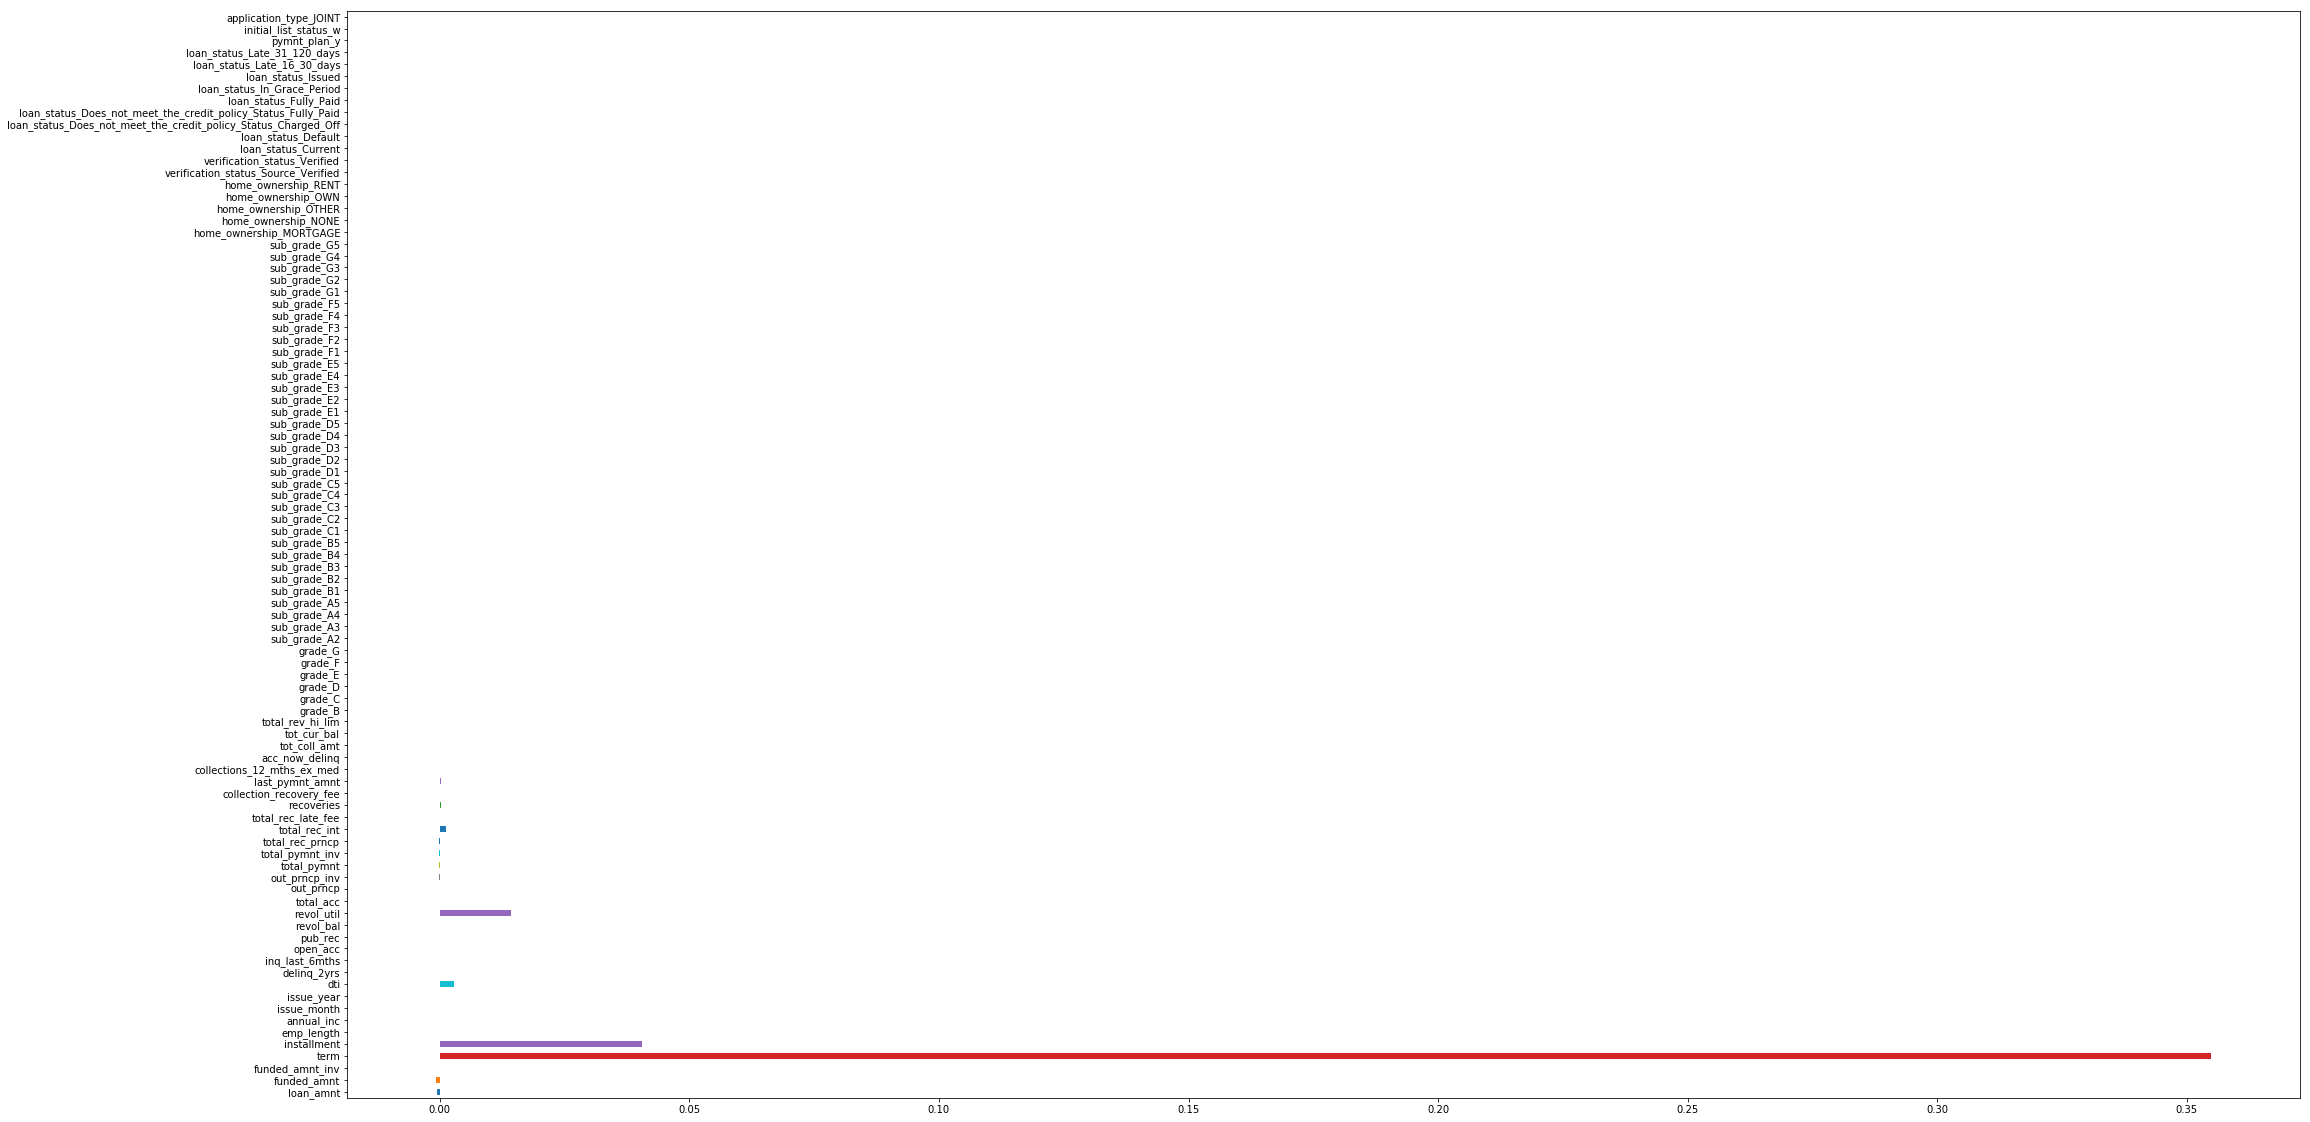

In [10]:
plt.figure(figsize=(35,20))
ft_importances_lm_lasso = pd.Series(lm_lasso.coef_, index = independent.columns)
ft_importances_lm_lasso.plot(kind='barh')
plt.show();

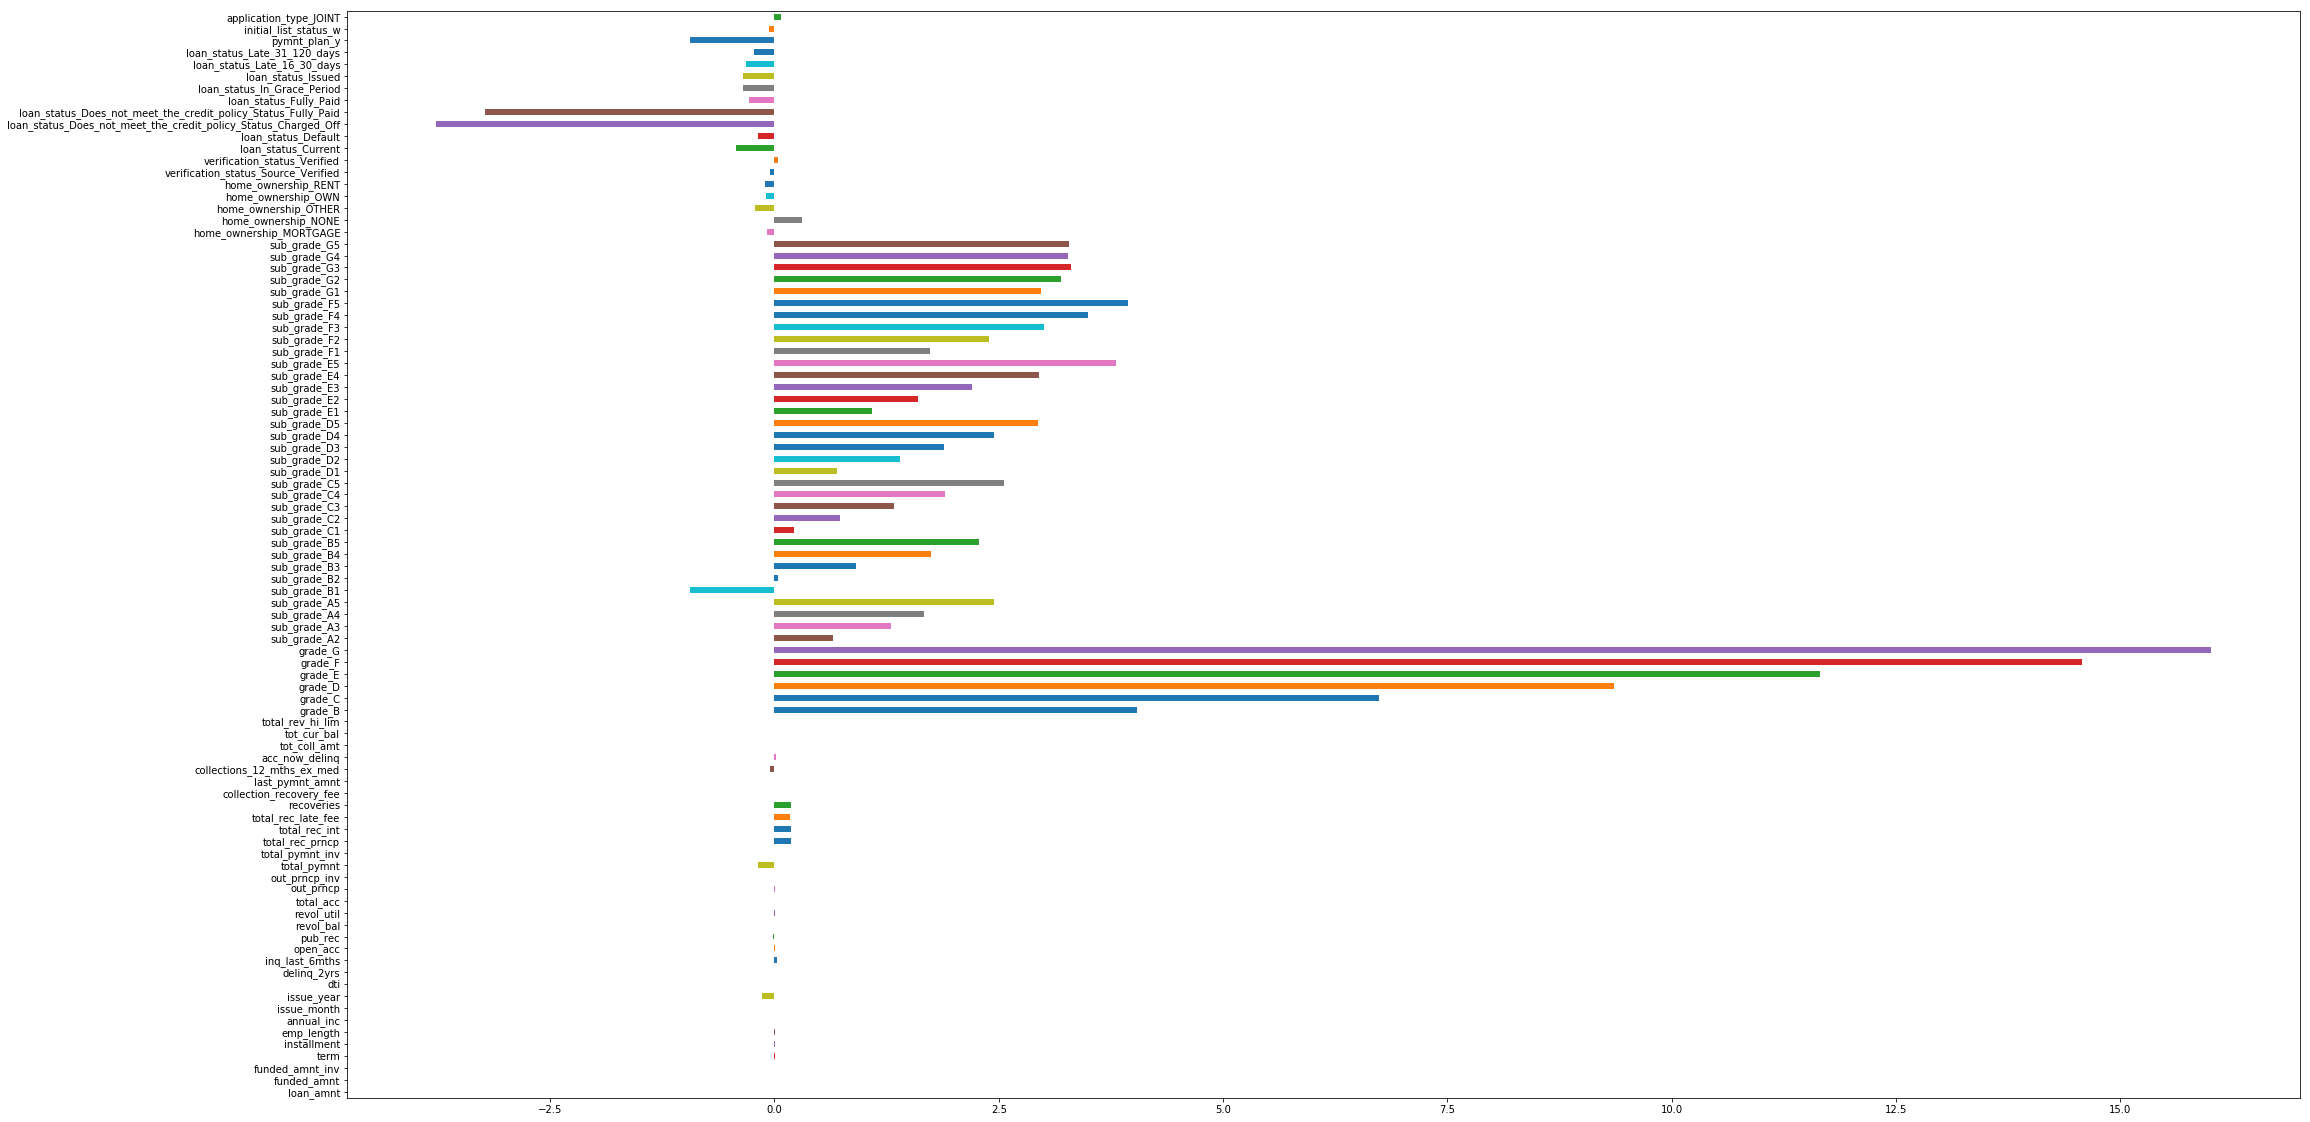

In [11]:
plt.figure(figsize=(35,20))
ft_importances_lm_ridge = pd.Series(lm_ridge.coef_, index = independent.columns)
ft_importances_lm_ridge.plot(kind='barh')
plt.show();

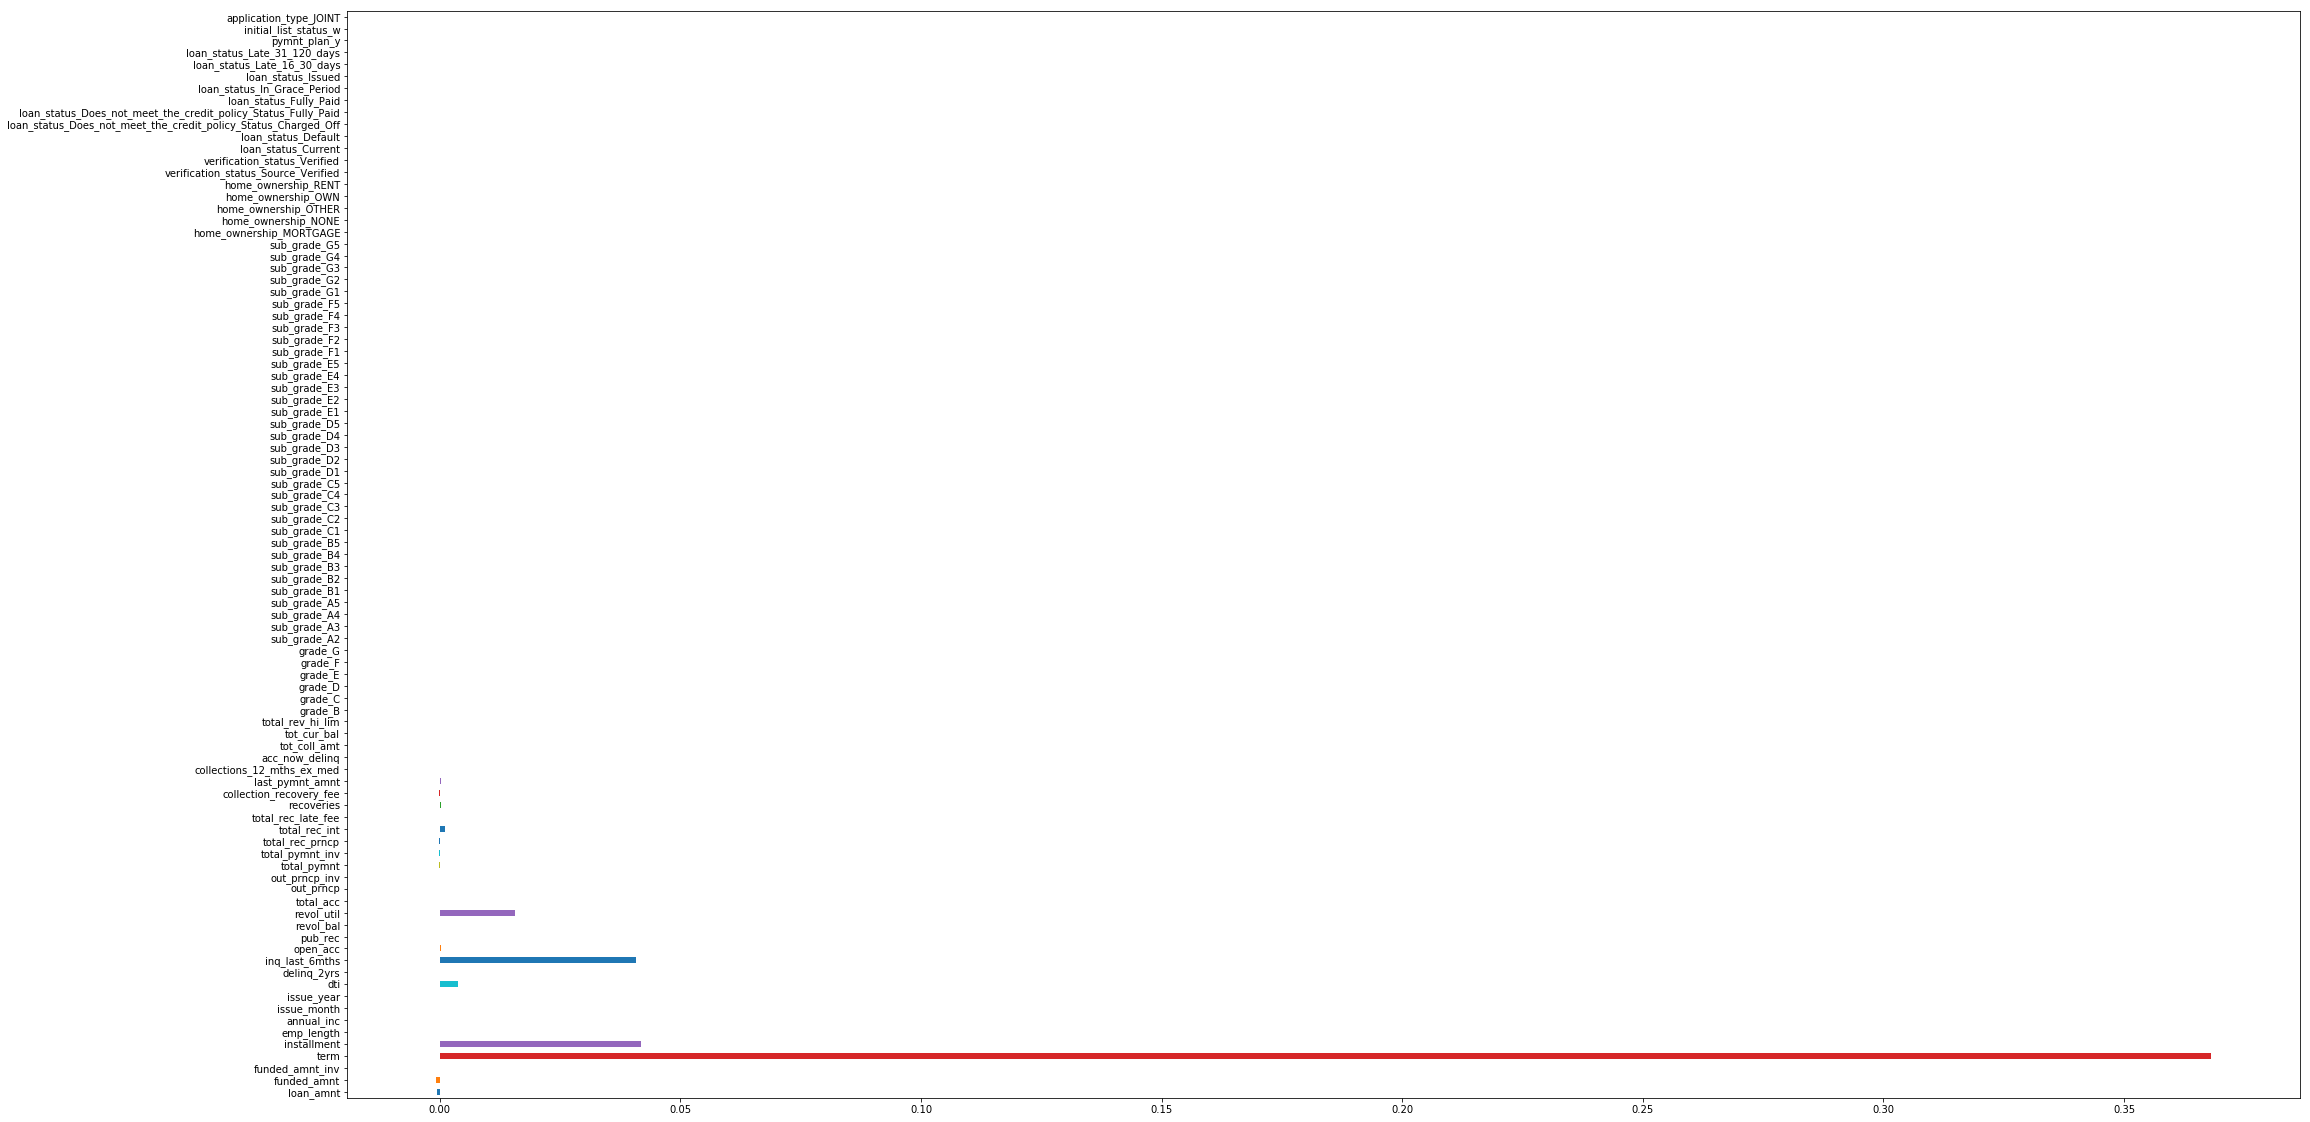

In [12]:
plt.figure(figsize=(35,20))
ft_importances_lm_elastic = pd.Series(lm_elastic.coef_, index = independent.columns)
ft_importances_lm_elastic.plot(kind='barh')
plt.show();

In [13]:
ft_importances_lm_elastic

loan_amnt                                                        -4.977337e-04
funded_amnt                                                      -7.771596e-04
funded_amnt_inv                                                   4.962818e-06
term                                                              3.681480e-01
installment                                                       4.172386e-02
emp_length                                                       -0.000000e+00
annual_inc                                                       -2.020569e-06
issue_month                                                       0.000000e+00
issue_year                                                       -0.000000e+00
dti                                                               3.852935e-03
delinq_2yrs                                                       0.000000e+00
inq_last_6mths                                                    4.069242e-02
open_acc                                            

In [14]:
# R2 Value

print("RSquare Value for Lasso Regression Test Data is-")
np.round(lm_lasso.score(test_x,test_y)*100,2)

print("RSquare Value for Ridge Regression Test Data is-")
np.round(lm_ridge.score(test_x,test_y)*100,2)

print("RSquare Value for Elastic Net Regression Test Data is-")
np.round(lm_elastic.score(test_x,test_y)*100,2)

RSquare Value for Lasso Regression Test Data is-


60.19

RSquare Value for Ridge Regression Test Data is-


97.66

RSquare Value for Elastic Net Regression Test Data is-


60.65

In [15]:
# Predict on Training and Test Data

predict_test_lasso = lm_lasso.predict(test_x)
predict_test_ridge = lm_ridge.predict(test_x)
predict_test_elastic = lm_elastic.predict(test_x)


In [17]:
mse_lasso = np.round(metrics.mean_squared_error(test_y, predict_test_lasso),2)
errors_test_lasso = abs(predict_test_lasso - test_y)
mape_test_lasso = 100 * np.mean(errors_test_lasso / test_y)
accuracy_test_lasso = 100 - mape_test_lasso

print("Lasso Regression Mean Squared ERROR (MSE) for Test Data is {}".format(mse_lasso))
print("Lasso MAPE for Test Data is {}%".format(mape_test_lasso))
print("Lasso Accuracy for Test Data is {}%".format(accuracy_test_lasso))

mse_ridge = np.round(metrics.mean_squared_error(test_y, predict_test_ridge),2)
errors_test_ridge = abs(predict_test_ridge - test_y)
mape_test_ridge = 100 * np.mean(errors_test_ridge / test_y)
accuracy_test_ridge = 100 - mape_test_ridge

print("Ridge Regression Mean Squared ERROR (MSE) for Test Data is {}".format(mse_ridge))
print("Ridge MAPE for Test Data is {}%".format(mape_test_ridge))
print("Ridge Accuracy for Test Data is {}%".format(accuracy_test_ridge))

mse_elastic = np.round(metrics.mean_squared_error(test_y, predict_test_elastic),2)
errors_test_elastic = abs(predict_test_elastic - test_y)
mape_test_elastic = 100 * np.mean(errors_test_elastic / test_y)
accuracy_test_elastic = 100 - mape_test_elastic

print("Elastic Regression Mean Squared ERROR (MSE) for Test Data is {}".format(mse_elastic))
print("Elastic MAPE for Test Data is {}%".format(mape_test_elastic))
print("Elastic Accuracy for Test Data is {}%".format(accuracy_test_elastic))

Lasso Regression Mean Squared ERROR (MSE) for Test Data is 7.62
Lasso MAPE for Test Data is 18.323340439479892%
Lasso Accuracy for Test Data is 81.67665956052011%
Ridge Regression Mean Squared ERROR (MSE) for Test Data is 0.45
Ridge MAPE for Test Data is 3.506297549251986%
Ridge Accuracy for Test Data is 96.49370245074802%
Elastic Regression Mean Squared ERROR (MSE) for Test Data is 7.54
Elastic MAPE for Test Data is 18.1853109239437%
Elastic Accuracy for Test Data is 81.8146890760563%


# Creating an Evaluation Function to Run Models

In [18]:
def evaluate(model,X_train,X_test,Y_train,Y_test):
    
    model.fit(X_train,Y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    errors_train = abs(predictions_train - Y_train)
    errors_test = abs(predictions_test - Y_test)
    
    mape_train = 100 * np.mean(errors_train / Y_train)
    mape_test = 100 * np.mean(errors_test / Y_test)
    
    accuracy_train = 100 - mape_train
    accuracy_test = 100 - mape_test
    print('Model Performance')
    print('Average Error(Train Data): {:0.4f} of int rate.'.format(np.mean(errors_train)))
    print('Average Error(Test Data): {:0.4f} of int rate.'.format(np.mean(errors_test)))
    
    print('Accuracy(Train Data) = {:0.2f}%.'.format(accuracy_train))
    print('Accuracy(Test Data) = {:0.2f}%.'.format(accuracy_test))
    
    print('Mape(Train Data): {:0.4f} of int rate'.format(mape_train))
    print('Mape(Test Data): {:0.4f} of int rate'.format(mape_test))
 
    return accuracy_train,accuracy_test

# Grid Search For Hyperparameter Tuning for all Models

In [19]:
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

In [21]:
# Tuning the Hyperparameter Alpha of Lasso Regression

model = Lasso()
grid_lasso = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid_lasso.fit(train_x,train_y)
print(grid_lasso)

# summarize the results of the grid search
print(grid_lasso.best_score_)
print(grid_lasso.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.9767278604161331
Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [22]:
# Tuning the Hyperparameter Alpha of Ridge Regression

model = Ridge()
grid_ridge = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid_ridge.fit(train_x,train_y)
print(grid_ridge)

# summarize the results of the grid search
print(grid_ridge.best_score_)
print(grid_ridge.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.231614e-17
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.089414e-17
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.145576e-17
 

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.9767370003008394
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [23]:
# Tuning the Hyperparameter Alpha of Elastic Regression

model = ElasticNet()
grid_elastic = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid_elastic.fit(train_x,train_y)
print(grid_elastic)

# summarize the results of the grid search
print(grid_elastic.best_score_)
print(grid_elastic.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.9767278604161331
ElasticNet(alpha=0.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


# Running the Models With the Best Hyperparmeters

In [24]:
lm_lasso_best = Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
                      normalize=False, positive=False, precompute=False, random_state=None,
                      selection='cyclic', tol=0.0001, warm_start=False)

evaluate(lm_lasso_best, train_x, test_x, train_y, test_y)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Model Performance
Average Error(Train Data): 0.4560 of int rate.
Average Error(Test Data): 0.4573 of int rate.
Accuracy(Train Data) = 96.50%.
Accuracy(Test Data) = 96.49%.
Mape(Train Data): 3.5007 of int rate
Mape(Test Data): 3.5072 of int rate


(96.49925753333035, 96.49278401620562)

In [25]:
lm_ridge_best = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                      normalize=False, random_state=None, solver='auto', tol=0.001)

evaluate(lm_ridge_best,train_x, test_x, train_y, test_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.770763e-17
  overwrite_a=True).T


Model Performance
Average Error(Train Data): 0.4558 of int rate.
Average Error(Test Data): 0.4571 of int rate.
Accuracy(Train Data) = 96.50%.
Accuracy(Test Data) = 96.49%.
Mape(Train Data): 3.4997 of int rate
Mape(Test Data): 3.5063 of int rate


(96.50033464822206, 96.49370245074802)

In [26]:
lm_elastic_best = ElasticNet(alpha=0.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
                              max_iter=1000, normalize=False, positive=False, precompute=False,
                              random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

evaluate(lm_elastic_best,train_x, test_x, train_y, test_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Model Performance
Average Error(Train Data): 0.4560 of int rate.
Average Error(Test Data): 0.4573 of int rate.
Accuracy(Train Data) = 96.50%.
Accuracy(Test Data) = 96.49%.
Mape(Train Data): 3.5007 of int rate
Mape(Test Data): 3.5072 of int rate


(96.49925753333035, 96.49278401620562)

We Chose the Hyperparameter "Alpha" to Tune

By Applying Hyperparameter Tuning on the Alpha Values of all the three algorithms, we can se that the Model Performance Improved Significantly.